---

### Importing Libraries

In [82]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web
import quandl as qndl
import statsmodels as stsm
import yfinance as yf

---

### Importing Dataset

In [160]:
#BTC = yf.Ticker("BTC-USD").history(period="max").reset_index()[["Date","Open","High","Low","Close","Volume"]]
BTC = web.DataReader("BTC-USD", data_source="yahoo",start="2010-01-01").reset_index()[["Date","Open","High","Low","Close","Adj Close","Volume"]]
BTC = pd.DataFrame(data=BTC)
BTC['Simple Daily Return'] = (BTC['Adj Close'] / BTC['Adj Close'].shift(1)) - 1
BTC['Log Daily Return']= np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
BTC.tail(5)


,Date,Open,High,Low,Close,Adj Close,Volume,Simple Daily Return,Log Daily Return
2828,2022-06-15,22196.730469,22642.671875,20178.376953,22572.839844,22572.839844,54912007015,0.016484,0.016349
2829,2022-06-16,22576.304688,22868.921875,20265.226562,20381.650391,20381.650391,31183975654,-0.097072,-0.102112
2830,2022-06-17,20385.718750,21243.312500,20326.519531,20471.482422,20471.482422,27132421514,0.004407,0.004398
2831,2022-06-18,20473.425781,20736.041016,17708.623047,19017.642578,19017.642578,42009436760,-0.071018,-0.073666
2832,2022-06-19,18936.421875,19816.035156,18085.064453,19682.156250,19682.156250,40671084544,0.034942,0.034345


In [161]:
BTC.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2833.0,1.238486e+04,1.662383e+04,1.768970e+02,6.263520e+02,6.515410e+03,1.142170e+04,6.754973e+04
High,2833.0,1.270726e+04,1.705325e+04,2.117310e+02,6.388330e+02,6.625730e+03,1.170410e+04,6.878962e+04
Low,2833.0,1.202208e+04,1.612505e+04,1.715100e+02,6.185000e+02,6.445310e+03,1.116657e+04,6.638206e+04
Close,2833.0,1.239002e+04,1.661915e+04,1.781030e+02,6.293670e+02,6.529170e+03,1.142590e+04,6.756683e+04
Adj Close,2833.0,1.239002e+04,1.661915e+04,1.781030e+02,6.293670e+02,6.529170e+03,1.142590e+04,6.756683e+04
Volume,2833.0,1.537506e+10,1.996560e+10,5.914570e+06,8.576240e+07,5.662660e+09,2.619861e+10,3.509679e+11
Simple Daily Return,2832.0,2.092373e-03,3.887704e-02,-3.716954e-01,-1.376378e-02,1.961868e-03,1.825204e-02,2.524717e-01
Log Daily Return,2832.0,1.328409e-03,3.921452e-02,-4.647302e-01,-1.385938e-02,1.959946e-03,1.808747e-02,2.251190e-01


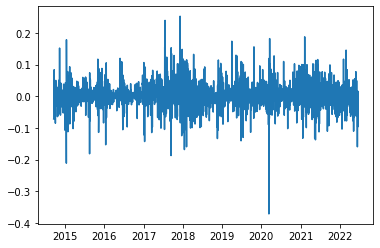

In [11]:
plt.plot(BTC['Date'],BTC['Simple Daily Return'])
plt.show()

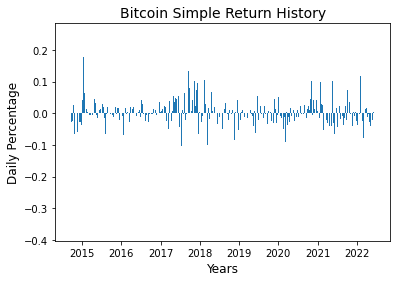

In [18]:
plt.bar(BTC['Date'],BTC['Simple Daily Return'])
plt.title("Bitcoin Simple Return History", fontsize=14)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Daily Percentage", fontsize=12)
plt.show()

---

### Simple Return for Multiple Assets

In [25]:
avg_daily_return = BTC['Simple Daily Return'].mean()
avg_daily_return

0.0020850704593115207

In [27]:
avg_annual_return = avg_daily_return * 254
avg_annual_return

0.5296078966651263

In [101]:
avasr = round(float(avg_annual_return),6)
avasr = avasr * 100
avasr

52.9608

In [102]:
print("Avarage Annual Simple Return of Bitcoin History: "+str(avasr)+"%")

Avarage Annual Simple Return of Bitcoin History: 52.9608%


---

### Log Return for a Single Asset

In [91]:
avg_log_daily_return = BTC['Log Daily Return'].mean()
avg_log_daily_return 

0.0013238243173739129

In [92]:
avg_log_annual_return = avg_log_daily_return * 254
avg_log_annual_return

0.3362513766129739

In [94]:
avalr = float(round(avg_log_annual_return,5))*100
avalr

33.625

In [97]:
print("Avarage Annual Log Return of Bitcoin History: "+str(avalr)+"%")

Avarage Annual Log Return of Bitcoin History: 33.625%


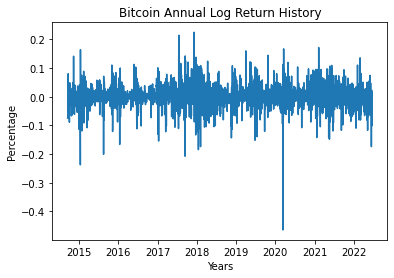

In [89]:
plt.plot(BTC['Date'],BTC['Log Daily Return'])
plt.title('Bitcoin Annual Log Return History')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.show()

---

### Portifolio Return

In [126]:
Ticker=['BTC-USD','ETH-USD','ADA-USD','BNB-USD','BCH-USD']

In [127]:
crypto_hist = pd.DataFrame()
for asset in Ticker:
    crypto_hist[asset]=web.DataReader(asset,data_source='yahoo',start='2019-01-01').reset_index()[["Adj Close"]]

In [128]:
crypto_hist

,BTC-USD,ETH-USD,ADA-USD,BNB-USD,BCH-USD
0,3843.520020,140.819412,0.042547,6.075273,164.854599
1,3943.409424,155.047684,0.045258,6.188613,171.827377
2,3836.741211,149.135010,0.042682,5.903535,162.049927
3,3857.717529,154.581940,0.043812,6.065138,161.395630
4,3845.194580,155.638596,0.044701,6.065543,160.401215
...,...,...,...,...,...
1261,22572.839844,1233.206421,0.533296,233.396713,127.572388
1262,20381.650391,1067.730713,0.475022,209.538742,109.380051
1263,20471.482422,1086.519287,0.487392,215.891800,120.936127
1264,19017.642578,993.636780,0.456182,197.042999,116.519043


In [130]:
crypto_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
BTC-USD,1266.0,24114.422331,18772.132046,3399.471680,8696.936035,11758.937988,40819.063477,67566.828125
ETH-USD,1266.0,1300.702592,1373.050283,104.535301,186.897224,386.660217,2506.881104,4812.087402
ADA-USD,1266.0,0.594877,0.725721,0.023961,0.051454,0.111932,1.167430,2.968239
BNB-USD,1266.0,172.061030,200.340283,5.568757,18.114061,30.043416,361.936890,675.684082
BCH-USD,1266.0,367.412909,194.042500,109.380051,235.893154,307.143402,455.964287,1542.425049


In [131]:
daily_returns = (crypto_hist / crypto_hist.shift(1)) - 1
daily_returns

,BTC-USD,ETH-USD,ADA-USD,BNB-USD,BCH-USD
0,NaN,NaN,NaN,NaN,NaN
1,0.025989,0.101039,0.063718,0.018656,0.042297
2,-0.027050,-0.038135,-0.056918,-0.046065,-0.056903
3,0.005467,0.036523,0.026475,0.027374,-0.004038
4,-0.003246,0.006836,0.020291,0.000067,-0.006161
...,...,...,...,...,...
1261,0.016484,0.017780,0.100973,0.045585,0.010147
1262,-0.097072,-0.134183,-0.109271,-0.102221,-0.142604
1263,0.004407,0.017597,0.026041,0.030319,0.105651
1264,-0.071018,-0.085486,-0.064035,-0.087307,-0.036524


In [157]:
#BTC as reference
weights_1 = np.array([0.40,0.25,0.15,0.15,0.05])

#ADA as reference
weights_2 = np.array([0.15,0.25,0.40,0.15,0.05])

In [133]:
avg_portifolio_daily_return = daily_returns.mean()
avg_portifolio_daily_return

BTC-USD    0.002050
ETH-USD    0.002818
ADA-USD    0.003588
BNB-USD    0.004344
BCH-USD    0.001426
dtype: float64

In [134]:
avg_portifolio_annual_return = avg_portifolio_daily_return * 254
avg_portifolio_annual_return

BTC-USD    0.520727
ETH-USD    0.715854
ADA-USD    0.911235
BNB-USD    1.103492
BCH-USD    0.362113
dtype: float64

In [154]:
portifolio1_return = np.dot(avg_portifolio_annual_return,weights_1)
portifolio1_return = round(portifolio1_return,4)*100
#portifolio_return

In [149]:
print("Avarage Return of the Crypto Portifolio: "+str(portifolio1_return)+"%")

Avarage Return of the Crypto Portifolio: 70.76%


In [158]:
portifolio2_return = np.dot(avg_portifolio_annual_return,weights_2)
portifolio2_return = round(portifolio2_return,4)*100
#portifolio_return

In [159]:
print("Avarage Return of the Crypto Portifolio: "+str(portifolio2_return)+"%")

Avarage Return of the Crypto Portifolio: 80.52%
